## Import data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib . pyplot as plt
sns.set_style('darkgrid')
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)

## Understand data

In [2]:
data = pd.read_excel("default of credit card clients.xls",header=1)

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [5]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
sum(data.isnull().sum())

0

In [7]:
data.dtypes.value_counts()

int64    25
dtype: int64

In [8]:
data.index,data.columns

(RangeIndex(start=0, stop=30000, step=1),
 Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
        'default payment next month'],
       dtype='object'))

## EDA

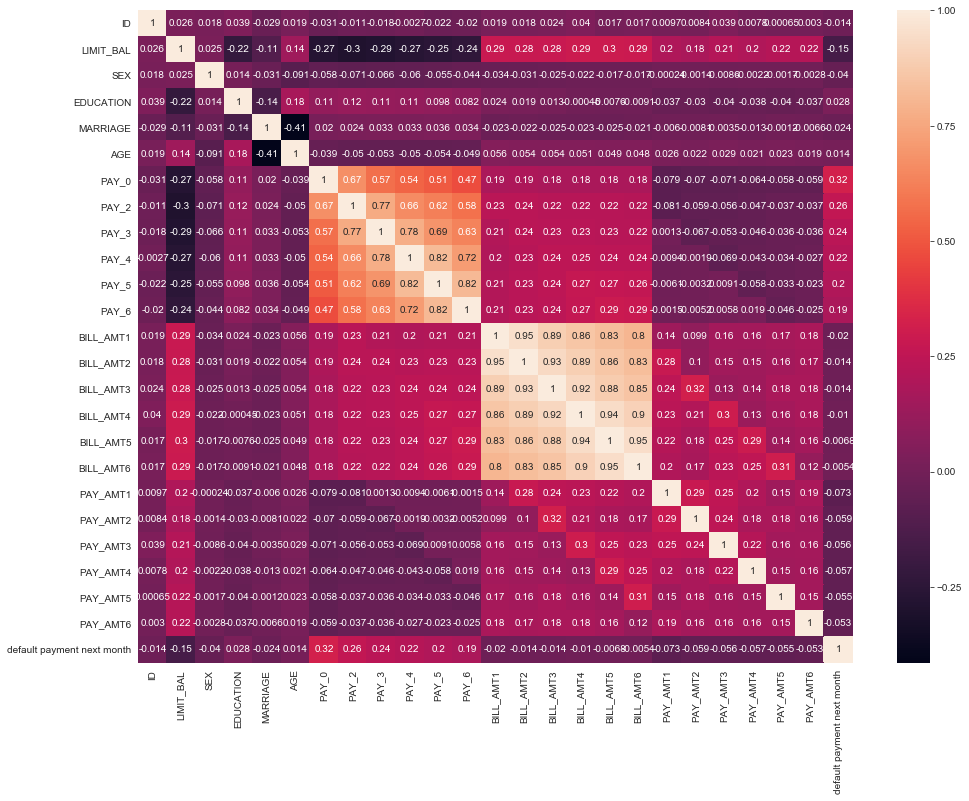

In [9]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),annot=True)

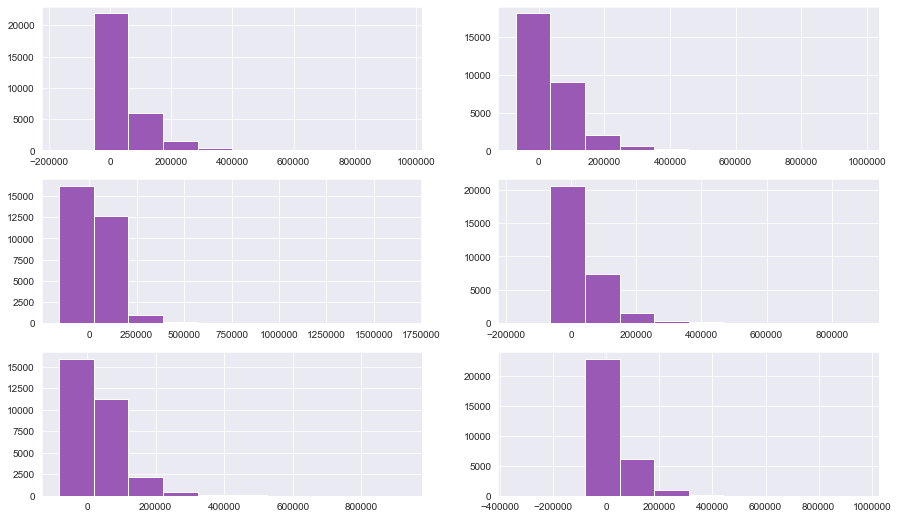

In [10]:
fig,ax = plt.subplots(3,2,figsize=(15,9))
cols = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for i,ax in enumerate(ax.flatten()):
    ax.hist(data[cols[i]])

In [11]:
print('SEX')
print(data['SEX'].value_counts())
print('Education')
print(data['EDUCATION'].value_counts())
print('Marriage')
print(data['MARRIAGE'].value_counts())
print('Age')
print(data['AGE'].value_counts().head())

SEX
2    18112
1    11888
Name: SEX, dtype: int64
Education
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
Marriage
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
Age
29    1605
27    1477
28    1409
30    1395
26    1256
Name: AGE, dtype: int64


In [12]:
data['SEX'] = data['SEX'].map({1:0,2:1})# change sex from 1,2 to 0,1

Education ,Marriage and Age has rare labels..

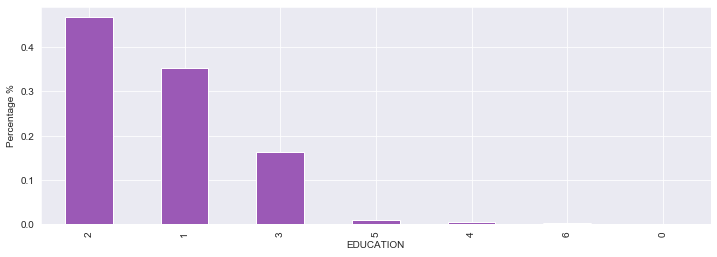

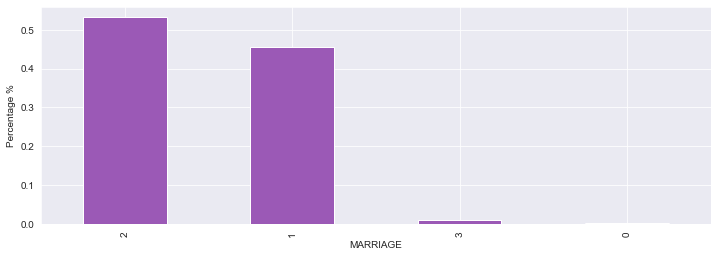

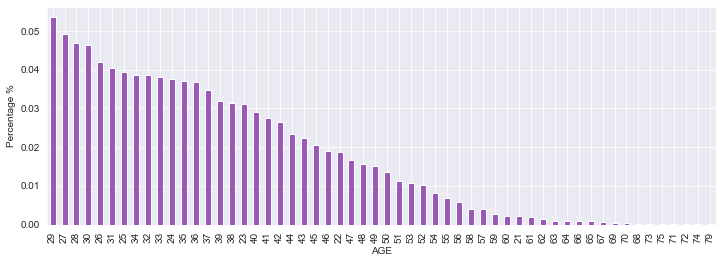

In [13]:
cols= ['EDUCATION','MARRIAGE','AGE']

for col in cols:
    plt.figure(figsize=(12,4))
    temp_df = pd.Series(data[col].value_counts()/len(data)) # percentage of each values
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    fig.set_ylabel('Percentage %')
    plt.show()

from the above we can see that education 5,4,6,0 lie below 5%,
marriage 3 and 0 lie below 5%
age 52 and numbers of ages lie below 10%

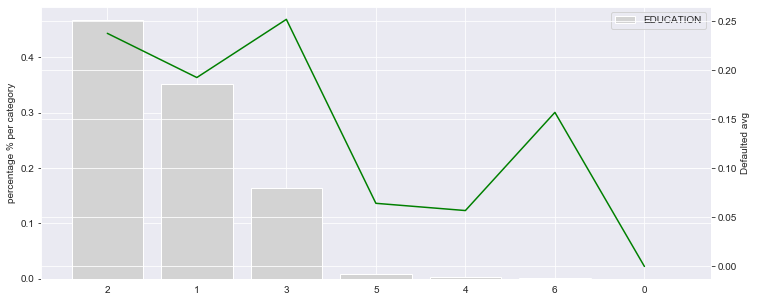

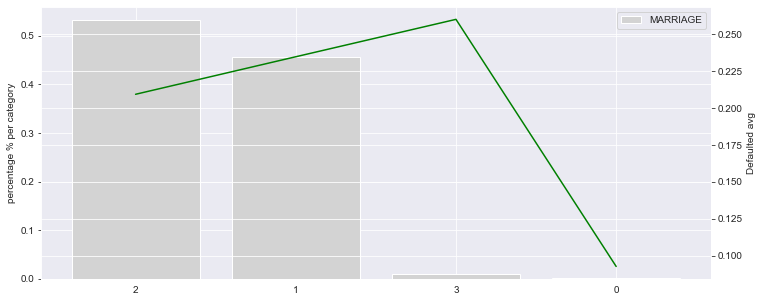

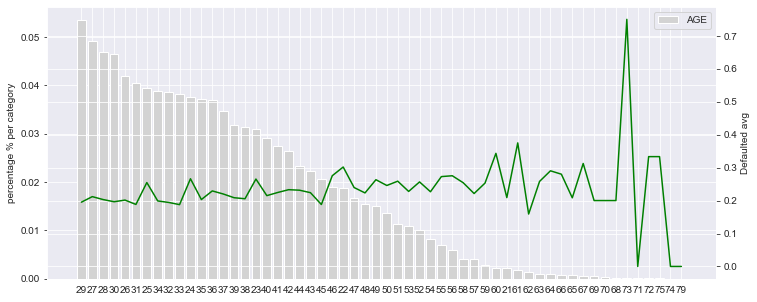

In [14]:
# let's automate the above process for all the categorical variables

for col in cols:
    # calculate the frequency of the different labels in the variable
    temp_df = pd.Series(data[col].value_counts() / len(data)).reset_index()

    # rename the columns
    temp_df.columns = [col, col + '_perc']

    # merge onto the mean time to pass the test
    temp_df = temp_df.merge(
        data.groupby([col])['default payment next month'].mean().reset_index(), on=col, how='left')

    # plot the figure as shown above
    fig, ax = plt.subplots(figsize=(12, 5))
    plt.xticks(temp_df.index, temp_df[col], rotation=0)
    ax2 = ax.twinx()

    ax.bar(
        temp_df.index,
        temp_df[col + '_perc'],
        color='lightgrey',
        label=col)

    ax2.plot(
        temp_df.index,
        temp_df["default payment next month"],
        color='green',
    )

    ax.set_ylabel('percentage % per category')
    ax2.set_ylabel('Defaulted avg')
    ax.legend()
    plt.show()

as seen above the avg for rare labels are relatively high because of less number of appearance,this can cause distortion in
the dataset when predicting

let's handle these rare labels

In [15]:
temp_df = pd.Series(data['EDUCATION'].value_counts() / len(data))
temp_df.sort_values(ascending=False)
temp_df

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: EDUCATION, dtype: float64

In [16]:
# let's create a dictionary to replace the rare labels with the
# with number 0

grouping_dict = {
    k: ('e0' if k not in temp_df[temp_df >= 0.1].index else 'e'+str(k))
    for k in temp_df.index
}

grouping_dict

{2: 'e2', 1: 'e1', 3: 'e3', 5: 'e0', 4: 'e0', 6: 'e0', 0: 'e0'}

In [17]:
data['EDUCATION_grouped'] = data['EDUCATION'].map(grouping_dict)

In [18]:
temp_df = pd.Series(data['MARRIAGE'].value_counts() / len(data))
temp_df.sort_values(ascending=False)
temp_df

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

In [19]:
grouping_dict = {
    k: ('m0' if k not in temp_df[temp_df >= 0.1].index else 'm'+str(k))
    for k in temp_df.index
}
grouping_dict

{2: 'm2', 1: 'm1', 3: 'm0', 0: 'm0'}

In [20]:
data['MARRIAGE_grouped'] = data['MARRIAGE'].map(grouping_dict)

In [21]:
byAge = data.groupby('AGE').mean()['default payment next month']

In [22]:
byAge.sort_values().head()

AGE
79    0.000000
74    0.000000
71    0.000000
62    0.159091
33    0.187609
Name: default payment next month, dtype: float64

In [23]:
bins = [-1, 0, 0.21, 0.22, 0.23, 0.25, 0.29, 0.39,0.9]
labels = ['a1','a2','a3','a4','a5','a6','a7','a8']
ageMapper = pd.cut(byAge.sort_values(),bins=bins,labels=labels)

In [24]:
age_grouped = {k: (ageMapper[k]) for k in ageMapper.index}

In [25]:
data['AGE_grouped'] = data['AGE'].map(age_grouped)

In [26]:
edu = pd.get_dummies(data['EDUCATION_grouped'],drop_first=True)
mar = pd.get_dummies(data['MARRIAGE_grouped'],drop_first=True)
age = pd.get_dummies(data['AGE_grouped'],drop_first=True)

In [27]:
data = pd.concat([data,edu,mar,age],axis=1)

In [28]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,e3,m1,m2,a2,a3,a4,a5,a6,a7,a8
0,1,20000,1,2,1,24,2,2,-1,-1,...,0,1,0,0,0,0,0,1,0,0
1,2,120000,1,2,2,26,-1,2,0,0,...,0,0,1,1,0,0,0,0,0,0
2,3,90000,1,2,2,34,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,4,50000,1,2,1,37,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,5,50000,0,2,1,57,-1,0,-1,0,...,0,1,0,0,0,1,0,0,0,0


### let's view pay values that lies above 3rd quartile if they occur for all pay_values

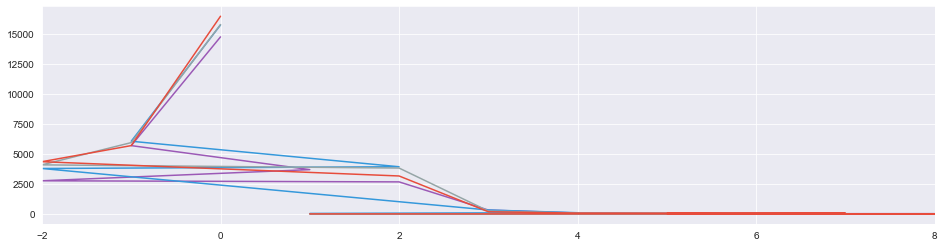

In [29]:
 plt.figure(figsize=(16,4))
data['PAY_0'].value_counts().plot()
data['PAY_2'].value_counts().plot()
data['PAY_3'].value_counts().plot()
data['PAY_4'].value_counts().plot()

from the above we can see that from 4 to 7 pay values have similar pattern

## Split data

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = data.drop(['ID','EDUCATION', 'MARRIAGE', 'AGE','default payment next month',\
               'EDUCATION_grouped','MARRIAGE_grouped','AGE_grouped'],axis=1)
y = data['default payment next month']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 42)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
ms = MinMaxScaler()

In [35]:
X_train =ms.fit_transform(X_train)

In [59]:
X_test = ms.transform(X_test)

## Build Model

In [37]:
import tensorflow as tf

In [38]:
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras import regularizers,backend
from tensorflow.keras.constraints import max_norm
from sklearn.metrics import roc_auc_score

In [39]:
model = keras.Sequential([
    Dense(128,activation='relu',input_shape=[len(X.columns)],kernel_initializer = "normal", kernel_regularizer=regularizers.l2(0.005), 
                kernel_constraint = max_norm(5)),
    Dropout(0.2),
    #BatchNormalization(),
    Dense(256,activation='relu', kernel_regularizer=regularizers.l2(0.005), 
                kernel_constraint = max_norm(5)),
    Dropout(0.1),
    #BatchNormalization(),
    Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.005), 
                kernel_constraint = max_norm(5)),
    Dropout(0.1),
    #BatchNormalization(),
    Dense(64,activation='tanh',kernel_regularizer=regularizers.l2(0.005), 
                kernel_constraint = max_norm(5)),
    Dropout(0.1),
    #BatchNormalization(),
    Dense(1,activation='sigmoid')
])

In [40]:
optimizer = tf.keras.optimizers.Adam(0.001)
tensorboard = TensorBoard(log_dir="logs")

In [41]:
model.compile( loss = 'binary_crossentropy',
              metrics = ['accuracy'],
             optimizer=optimizer)

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               4224      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [43]:
%load_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 11404), started 0:35:15 ago. (Use '!kill 11404' to kill it.)

In [44]:
history = model.fit(
  X_train, y_train,
  epochs=1000, batch_size=100,validation_split = 0.1,callbacks=[tensorboard])

Train on 21600 samples, validate on 2400 samples
Epoch 1/1000
21600/21600 [==============================] - 9s 416us/sample - loss: 0.9778 - accuracy: 0.7768 - val_loss: 0.5435 - val_accuracy: 0.7738
Epoch 2/1000
21600/21600 [==============================] - 3s 150us/sample - loss: 0.5138 - accuracy: 0.7999 - val_loss: 0.5164 - val_accuracy: 0.7875
Epoch 3/1000
21600/21600 [==============================] - 4s 175us/sample - loss: 0.4994 - accuracy: 0.8065 - val_loss: 0.5115 - val_accuracy: 0.7979
Epoch 4/1000
21600/21600 [==============================] - 3s 150us/sample - loss: 0.4967 - accuracy: 0.8062 - val_loss: 0.5063 - val_accuracy: 0.7929
Epoch 5/1000
21600/21600 [==============================] - 3s 158us/sample - loss: 0.4932 - accuracy: 0.8091 - val_loss: 0.5050 - val_accuracy: 0.7983
Epoch 6/1000
21600/21600 [==============================] - 3s 152us/sample - loss: 0.4920 - accuracy: 0.8073 - val_loss: 0.5036 - val_accuracy: 0.7996
Epoch 7/1000
21600/21600 [=============

21600/21600 [==============================] - 4s 200us/sample - loss: 0.4724 - accuracy: 0.8145 - val_loss: 0.4842 - val_accuracy: 0.8046
Epoch 53/1000
21600/21600 [==============================] - 3s 152us/sample - loss: 0.4715 - accuracy: 0.8139 - val_loss: 0.4824 - val_accuracy: 0.8079
Epoch 54/1000
21600/21600 [==============================] - 3s 138us/sample - loss: 0.4742 - accuracy: 0.8135 - val_loss: 0.4844 - val_accuracy: 0.8062
Epoch 55/1000
21600/21600 [==============================] - 3s 154us/sample - loss: 0.4724 - accuracy: 0.8143 - val_loss: 0.4852 - val_accuracy: 0.8058
Epoch 56/1000
21600/21600 [==============================] - 3s 133us/sample - loss: 0.4717 - accuracy: 0.8166 - val_loss: 0.4915 - val_accuracy: 0.8000
Epoch 57/1000
21600/21600 [==============================] - 2s 96us/sample - loss: 0.4714 - accuracy: 0.8152 - val_loss: 0.4911 - val_accuracy: 0.7937
Epoch 58/1000
21600/21600 [==============================] - 3s 140us/sample - loss: 0.4730 - acc

21600/21600 [==============================] - 4s 205us/sample - loss: 0.4690 - accuracy: 0.8157 - val_loss: 0.4846 - val_accuracy: 0.8067
Epoch 106/1000
21600/21600 [==============================] - 3s 143us/sample - loss: 0.4683 - accuracy: 0.8164 - val_loss: 0.4821 - val_accuracy: 0.8071
Epoch 107/1000
21600/21600 [==============================] - 3s 145us/sample - loss: 0.4679 - accuracy: 0.8182 - val_loss: 0.4819 - val_accuracy: 0.8100
Epoch 108/1000
21600/21600 [==============================] - 3s 134us/sample - loss: 0.4688 - accuracy: 0.8149 - val_loss: 0.4831 - val_accuracy: 0.8054
Epoch 109/1000
21600/21600 [==============================] - 3s 140us/sample - loss: 0.4691 - accuracy: 0.8159 - val_loss: 0.4811 - val_accuracy: 0.8058
Epoch 110/1000
21600/21600 [==============================] - 3s 147us/sample - loss: 0.4683 - accuracy: 0.8168 - val_loss: 0.4792 - val_accuracy: 0.8025
Epoch 111/1000
21600/21600 [==============================] - 3s 150us/sample - loss: 0.467

21600/21600 [==============================] - 3s 158us/sample - loss: 0.4688 - accuracy: 0.8160 - val_loss: 0.4774 - val_accuracy: 0.8100
Epoch 159/1000
21600/21600 [==============================] - 4s 181us/sample - loss: 0.4684 - accuracy: 0.8155 - val_loss: 0.4804 - val_accuracy: 0.8083
Epoch 160/1000
21600/21600 [==============================] - 3s 160us/sample - loss: 0.4680 - accuracy: 0.8166 - val_loss: 0.4834 - val_accuracy: 0.8062
Epoch 161/1000
21600/21600 [==============================] - 4s 171us/sample - loss: 0.4679 - accuracy: 0.8160 - val_loss: 0.4807 - val_accuracy: 0.8083
Epoch 162/1000
21600/21600 [==============================] - 3s 150us/sample - loss: 0.4671 - accuracy: 0.8157 - val_loss: 0.4782 - val_accuracy: 0.8104
Epoch 163/1000
21600/21600 [==============================] - 3s 126us/sample - loss: 0.4676 - accuracy: 0.8143 - val_loss: 0.4887 - val_accuracy: 0.7958
Epoch 164/1000
21600/21600 [==============================] - 3s 151us/sample - loss: 0.468

21600/21600 [==============================] - 3s 132us/sample - loss: 0.4702 - accuracy: 0.8130 - val_loss: 0.4785 - val_accuracy: 0.8058
Epoch 212/1000
21600/21600 [==============================] - 3s 132us/sample - loss: 0.4662 - accuracy: 0.8171 - val_loss: 0.4820 - val_accuracy: 0.8029
Epoch 213/1000
21600/21600 [==============================] - 3s 135us/sample - loss: 0.4669 - accuracy: 0.8173 - val_loss: 0.4761 - val_accuracy: 0.8087
Epoch 214/1000
21600/21600 [==============================] - 3s 130us/sample - loss: 0.4670 - accuracy: 0.8167 - val_loss: 0.4811 - val_accuracy: 0.8100
Epoch 215/1000
21600/21600 [==============================] - 3s 133us/sample - loss: 0.4641 - accuracy: 0.8190 - val_loss: 0.4790 - val_accuracy: 0.8050
Epoch 216/1000
21600/21600 [==============================] - 3s 133us/sample - loss: 0.4658 - accuracy: 0.8171 - val_loss: 0.4767 - val_accuracy: 0.8092
Epoch 217/1000
21600/21600 [==============================] - 3s 133us/sample - loss: 0.465

21600/21600 [==============================] - 3s 132us/sample - loss: 0.4642 - accuracy: 0.8190 - val_loss: 0.4776 - val_accuracy: 0.8104
Epoch 265/1000
21600/21600 [==============================] - 3s 132us/sample - loss: 0.4651 - accuracy: 0.8165 - val_loss: 0.4809 - val_accuracy: 0.8042
Epoch 266/1000
21600/21600 [==============================] - 3s 132us/sample - loss: 0.4647 - accuracy: 0.8168 - val_loss: 0.4797 - val_accuracy: 0.8087
Epoch 267/1000
21600/21600 [==============================] - 3s 131us/sample - loss: 0.4667 - accuracy: 0.8150 - val_loss: 0.4782 - val_accuracy: 0.8100
Epoch 268/1000
21600/21600 [==============================] - 3s 132us/sample - loss: 0.4643 - accuracy: 0.8153 - val_loss: 0.4757 - val_accuracy: 0.8067
Epoch 269/1000
21600/21600 [==============================] - 3s 131us/sample - loss: 0.4667 - accuracy: 0.8139 - val_loss: 0.4783 - val_accuracy: 0.8079
Epoch 270/1000
21600/21600 [==============================] - 3s 131us/sample - loss: 0.465

21600/21600 [==============================] - 1s 54us/sample - loss: 0.4658 - accuracy: 0.8151 - val_loss: 0.4800 - val_accuracy: 0.8012
Epoch 318/1000
21600/21600 [==============================] - 2s 78us/sample - loss: 0.4647 - accuracy: 0.8166 - val_loss: 0.4768 - val_accuracy: 0.8050
Epoch 319/1000
21600/21600 [==============================] - 2s 82us/sample - loss: 0.4652 - accuracy: 0.8165 - val_loss: 0.4828 - val_accuracy: 0.8075
Epoch 320/1000
21600/21600 [==============================] - 2s 97us/sample - loss: 0.4651 - accuracy: 0.8142 - val_loss: 0.4759 - val_accuracy: 0.8067
Epoch 321/1000
21600/21600 [==============================] - 2s 81us/sample - loss: 0.4649 - accuracy: 0.8160 - val_loss: 0.4747 - val_accuracy: 0.8083
Epoch 322/1000
21600/21600 [==============================] - 2s 82us/sample - loss: 0.4657 - accuracy: 0.8167 - val_loss: 0.4752 - val_accuracy: 0.8062
Epoch 323/1000
21600/21600 [==============================] - 2s 115us/sample - loss: 0.4649 - ac

21600/21600 [==============================] - 3s 141us/sample - loss: 0.4654 - accuracy: 0.8174 - val_loss: 0.4744 - val_accuracy: 0.8058
Epoch 371/1000
21600/21600 [==============================] - 3s 123us/sample - loss: 0.4641 - accuracy: 0.8166 - val_loss: 0.4826 - val_accuracy: 0.8017
Epoch 372/1000
21600/21600 [==============================] - 3s 129us/sample - loss: 0.4645 - accuracy: 0.8153 - val_loss: 0.4759 - val_accuracy: 0.8079
Epoch 373/1000
21600/21600 [==============================] - 3s 146us/sample - loss: 0.4648 - accuracy: 0.8151 - val_loss: 0.4803 - val_accuracy: 0.7962
Epoch 374/1000
21600/21600 [==============================] - 3s 124us/sample - loss: 0.4634 - accuracy: 0.8161 - val_loss: 0.4790 - val_accuracy: 0.8050
Epoch 375/1000
21600/21600 [==============================] - 3s 128us/sample - loss: 0.4645 - accuracy: 0.8174 - val_loss: 0.4760 - val_accuracy: 0.8071
Epoch 376/1000
21600/21600 [==============================] - 3s 134us/sample - loss: 0.464

21600/21600 [==============================] - 2s 105us/sample - loss: 0.4675 - accuracy: 0.8134 - val_loss: 0.4812 - val_accuracy: 0.8025
Epoch 424/1000
21600/21600 [==============================] - 3s 136us/sample - loss: 0.4660 - accuracy: 0.8144 - val_loss: 0.4774 - val_accuracy: 0.8087
Epoch 425/1000
21600/21600 [==============================] - 3s 131us/sample - loss: 0.4669 - accuracy: 0.8159 - val_loss: 0.4757 - val_accuracy: 0.8075
Epoch 426/1000
21600/21600 [==============================] - 3s 135us/sample - loss: 0.4682 - accuracy: 0.8160 - val_loss: 0.4755 - val_accuracy: 0.8033
Epoch 427/1000
21600/21600 [==============================] - 3s 136us/sample - loss: 0.4640 - accuracy: 0.8150 - val_loss: 0.4785 - val_accuracy: 0.8067
Epoch 428/1000
21600/21600 [==============================] - 3s 137us/sample - loss: 0.4675 - accuracy: 0.8152 - val_loss: 0.4780 - val_accuracy: 0.8046
Epoch 429/1000
21600/21600 [==============================] - 3s 134us/sample - loss: 0.462

21600/21600 [==============================] - 3s 127us/sample - loss: 0.4623 - accuracy: 0.8166 - val_loss: 0.4739 - val_accuracy: 0.8104
Epoch 477/1000
21600/21600 [==============================] - 3s 144us/sample - loss: 0.4651 - accuracy: 0.8150 - val_loss: 0.4854 - val_accuracy: 0.7962
Epoch 478/1000
21600/21600 [==============================] - 3s 134us/sample - loss: 0.4644 - accuracy: 0.8181 - val_loss: 0.4801 - val_accuracy: 0.8000
Epoch 479/1000
21600/21600 [==============================] - 2s 89us/sample - loss: 0.4651 - accuracy: 0.8154 - val_loss: 0.4773 - val_accuracy: 0.8050
Epoch 480/1000
21600/21600 [==============================] - 3s 137us/sample - loss: 0.4638 - accuracy: 0.8177 - val_loss: 0.4737 - val_accuracy: 0.8112
Epoch 481/1000
21600/21600 [==============================] - 3s 138us/sample - loss: 0.4646 - accuracy: 0.8145 - val_loss: 0.4748 - val_accuracy: 0.8100
Epoch 482/1000
21600/21600 [==============================] - 2s 116us/sample - loss: 0.4639

21600/21600 [==============================] - 3s 130us/sample - loss: 0.4649 - accuracy: 0.8166 - val_loss: 0.4769 - val_accuracy: 0.8104
Epoch 530/1000
21600/21600 [==============================] - 3s 124us/sample - loss: 0.4666 - accuracy: 0.8149 - val_loss: 0.4812 - val_accuracy: 0.7992
Epoch 531/1000
21600/21600 [==============================] - 3s 117us/sample - loss: 0.4644 - accuracy: 0.8148 - val_loss: 0.4812 - val_accuracy: 0.8075
Epoch 532/1000
21600/21600 [==============================] - 3s 124us/sample - loss: 0.4635 - accuracy: 0.8178 - val_loss: 0.4881 - val_accuracy: 0.7950
Epoch 533/1000
21600/21600 [==============================] - 3s 122us/sample - loss: 0.4686 - accuracy: 0.8137 - val_loss: 0.4832 - val_accuracy: 0.8112
Epoch 534/1000
21600/21600 [==============================] - 2s 113us/sample - loss: 0.4640 - accuracy: 0.8145 - val_loss: 0.4826 - val_accuracy: 0.8017
Epoch 535/1000
21600/21600 [==============================] - 2s 116us/sample - loss: 0.469

21600/21600 [==============================] - 3s 124us/sample - loss: 0.4670 - accuracy: 0.8132 - val_loss: 0.4758 - val_accuracy: 0.8117
Epoch 583/1000
21600/21600 [==============================] - 3s 122us/sample - loss: 0.4665 - accuracy: 0.8163 - val_loss: 0.4733 - val_accuracy: 0.8104
Epoch 584/1000
21600/21600 [==============================] - 2s 102us/sample - loss: 0.4638 - accuracy: 0.8168 - val_loss: 0.4841 - val_accuracy: 0.8079
Epoch 585/1000
21600/21600 [==============================] - 3s 117us/sample - loss: 0.4637 - accuracy: 0.8150 - val_loss: 0.4775 - val_accuracy: 0.8092
Epoch 586/1000
21600/21600 [==============================] - 3s 125us/sample - loss: 0.4641 - accuracy: 0.8174 - val_loss: 0.4782 - val_accuracy: 0.8087
Epoch 587/1000
21600/21600 [==============================] - 3s 122us/sample - loss: 0.4629 - accuracy: 0.8176 - val_loss: 0.4735 - val_accuracy: 0.8100
Epoch 588/1000
21600/21600 [==============================] - 2s 115us/sample - loss: 0.464

21600/21600 [==============================] - 3s 131us/sample - loss: 0.4636 - accuracy: 0.8178 - val_loss: 0.4737 - val_accuracy: 0.8062
Epoch 636/1000
21600/21600 [==============================] - 3s 116us/sample - loss: 0.4654 - accuracy: 0.8143 - val_loss: 0.4729 - val_accuracy: 0.8104
Epoch 637/1000
21600/21600 [==============================] - 2s 94us/sample - loss: 0.4655 - accuracy: 0.8152 - val_loss: 0.4836 - val_accuracy: 0.8050
Epoch 638/1000
21600/21600 [==============================] - 3s 120us/sample - loss: 0.4635 - accuracy: 0.8167 - val_loss: 0.4723 - val_accuracy: 0.8112
Epoch 639/1000
21600/21600 [==============================] - 2s 112us/sample - loss: 0.4638 - accuracy: 0.8158 - val_loss: 0.4852 - val_accuracy: 0.7983
Epoch 640/1000
21600/21600 [==============================] - 3s 120us/sample - loss: 0.4648 - accuracy: 0.8159 - val_loss: 0.4741 - val_accuracy: 0.8117
Epoch 641/1000
21600/21600 [==============================] - 2s 116us/sample - loss: 0.4650

21600/21600 [==============================] - 2s 103us/sample - loss: 0.4623 - accuracy: 0.8157 - val_loss: 0.4738 - val_accuracy: 0.8017
Epoch 689/1000
21600/21600 [==============================] - 3s 126us/sample - loss: 0.4669 - accuracy: 0.8134 - val_loss: 0.4745 - val_accuracy: 0.8092
Epoch 690/1000
21600/21600 [==============================] - 2s 112us/sample - loss: 0.4672 - accuracy: 0.8141 - val_loss: 0.4796 - val_accuracy: 0.8033
Epoch 691/1000
21600/21600 [==============================] - 2s 113us/sample - loss: 0.4642 - accuracy: 0.8160 - val_loss: 0.4723 - val_accuracy: 0.8104
Epoch 692/1000
21600/21600 [==============================] - 2s 116us/sample - loss: 0.4619 - accuracy: 0.8180 - val_loss: 0.4756 - val_accuracy: 0.8100
Epoch 693/1000
21600/21600 [==============================] - 3s 119us/sample - loss: 0.4635 - accuracy: 0.8157 - val_loss: 0.4734 - val_accuracy: 0.8079
Epoch 694/1000
21600/21600 [==============================] - 2s 102us/sample - loss: 0.464

21600/21600 [==============================] - 2s 107us/sample - loss: 0.4635 - accuracy: 0.8163 - val_loss: 0.4775 - val_accuracy: 0.8100
Epoch 742/1000
21600/21600 [==============================] - 3s 121us/sample - loss: 0.4635 - accuracy: 0.8158 - val_loss: 0.4759 - val_accuracy: 0.8067
Epoch 743/1000
21600/21600 [==============================] - 3s 123us/sample - loss: 0.4633 - accuracy: 0.8175 - val_loss: 0.4724 - val_accuracy: 0.8071
Epoch 744/1000
21600/21600 [==============================] - 3s 116us/sample - loss: 0.4648 - accuracy: 0.8155 - val_loss: 0.4770 - val_accuracy: 0.8096
Epoch 745/1000
21600/21600 [==============================] - 2s 111us/sample - loss: 0.4640 - accuracy: 0.8158 - val_loss: 0.4769 - val_accuracy: 0.8058
Epoch 746/1000
21600/21600 [==============================] - 3s 139us/sample - loss: 0.4634 - accuracy: 0.8154 - val_loss: 0.4761 - val_accuracy: 0.8067
Epoch 747/1000
21600/21600 [==============================] - 2s 103us/sample - loss: 0.463

21600/21600 [==============================] - 3s 156us/sample - loss: 0.4664 - accuracy: 0.8150 - val_loss: 0.4798 - val_accuracy: 0.8054
Epoch 795/1000
21600/21600 [==============================] - 3s 131us/sample - loss: 0.4639 - accuracy: 0.8164 - val_loss: 0.4908 - val_accuracy: 0.7983
Epoch 796/1000
21600/21600 [==============================] - 3s 117us/sample - loss: 0.4654 - accuracy: 0.8138 - val_loss: 0.4845 - val_accuracy: 0.8017
Epoch 797/1000
21600/21600 [==============================] - 2s 111us/sample - loss: 0.4665 - accuracy: 0.8160 - val_loss: 0.4739 - val_accuracy: 0.8058
Epoch 798/1000
21600/21600 [==============================] - 3s 122us/sample - loss: 0.4637 - accuracy: 0.8145 - val_loss: 0.4743 - val_accuracy: 0.8108
Epoch 799/1000
21600/21600 [==============================] - 3s 120us/sample - loss: 0.4633 - accuracy: 0.8157 - val_loss: 0.4836 - val_accuracy: 0.8071
Epoch 800/1000
21600/21600 [==============================] - 2s 113us/sample - loss: 0.464

21600/21600 [==============================] - 3s 126us/sample - loss: 0.4633 - accuracy: 0.8151 - val_loss: 0.4743 - val_accuracy: 0.8058
Epoch 848/1000
21600/21600 [==============================] - 3s 119us/sample - loss: 0.4636 - accuracy: 0.8152 - val_loss: 0.4726 - val_accuracy: 0.8079
Epoch 849/1000
21600/21600 [==============================] - 3s 123us/sample - loss: 0.4653 - accuracy: 0.8148 - val_loss: 0.4828 - val_accuracy: 0.7933
Epoch 850/1000
21600/21600 [==============================] - 2s 94us/sample - loss: 0.4628 - accuracy: 0.8158 - val_loss: 0.4725 - val_accuracy: 0.8075
Epoch 851/1000
21600/21600 [==============================] - 2s 97us/sample - loss: 0.4638 - accuracy: 0.8167 - val_loss: 0.4754 - val_accuracy: 0.8075
Epoch 852/1000
21600/21600 [==============================] - 3s 134us/sample - loss: 0.4646 - accuracy: 0.8168 - val_loss: 0.4777 - val_accuracy: 0.8075
Epoch 853/1000
21600/21600 [==============================] - 2s 97us/sample - loss: 0.4643 -

21600/21600 [==============================] - 3s 122us/sample - loss: 0.4637 - accuracy: 0.8171 - val_loss: 0.4738 - val_accuracy: 0.8087
Epoch 901/1000
21600/21600 [==============================] - 3s 121us/sample - loss: 0.4659 - accuracy: 0.8139 - val_loss: 0.4790 - val_accuracy: 0.8062
Epoch 902/1000
21600/21600 [==============================] - 3s 118us/sample - loss: 0.4628 - accuracy: 0.8167 - val_loss: 0.4786 - val_accuracy: 0.8108
Epoch 903/1000
21600/21600 [==============================] - 3s 120us/sample - loss: 0.4642 - accuracy: 0.8151 - val_loss: 0.4767 - val_accuracy: 0.8079
Epoch 904/1000
21600/21600 [==============================] - 3s 121us/sample - loss: 0.4627 - accuracy: 0.8150 - val_loss: 0.4852 - val_accuracy: 0.8008
Epoch 905/1000
21600/21600 [==============================] - 2s 104us/sample - loss: 0.4645 - accuracy: 0.8150 - val_loss: 0.4781 - val_accuracy: 0.8133
Epoch 906/1000
21600/21600 [==============================] - 3s 126us/sample - loss: 0.463

21600/21600 [==============================] - 3s 148us/sample - loss: 0.4636 - accuracy: 0.8163 - val_loss: 0.4741 - val_accuracy: 0.8092
Epoch 954/1000
21600/21600 [==============================] - 4s 177us/sample - loss: 0.4634 - accuracy: 0.8160 - val_loss: 0.4760 - val_accuracy: 0.8083
Epoch 955/1000
21600/21600 [==============================] - 4s 176us/sample - loss: 0.4643 - accuracy: 0.8150 - val_loss: 0.4803 - val_accuracy: 0.7962
Epoch 956/1000
21600/21600 [==============================] - 3s 148us/sample - loss: 0.4638 - accuracy: 0.8144 - val_loss: 0.4746 - val_accuracy: 0.8092
Epoch 957/1000
21600/21600 [==============================] - 2s 112us/sample - loss: 0.4645 - accuracy: 0.8169 - val_loss: 0.4720 - val_accuracy: 0.8062
Epoch 958/1000
21600/21600 [==============================] - 2s 86us/sample - loss: 0.4647 - accuracy: 0.8162 - val_loss: 0.4781 - val_accuracy: 0.8012
Epoch 959/1000
21600/21600 [==============================] - 4s 177us/sample - loss: 0.4640

In [46]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.977830,0.776759,0.543469,0.773750
1,0.513761,0.799907,0.516391,0.787500
2,0.499426,0.806528,0.511531,0.797917
3,0.496685,0.806204,0.506330,0.792917
4,0.493213,0.809120,0.504964,0.798333
...,...,...,...,...
995,0.464965,0.814537,0.480786,0.798750
996,0.463100,0.816204,0.477413,0.807917
997,0.465221,0.813333,0.474504,0.807500
998,0.466455,0.814537,0.471849,0.809583


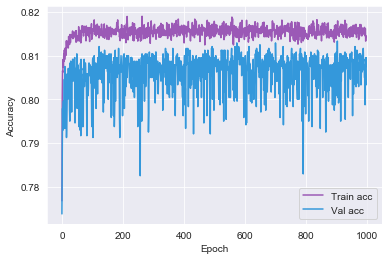

In [48]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist['epoch'], hist['accuracy'],
           label='Train acc')
plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val acc')
plt.legend()

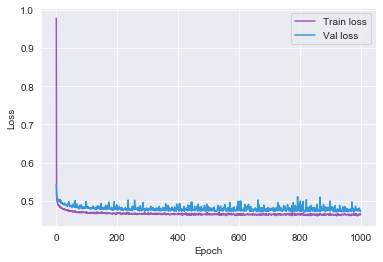

In [49]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(hist['epoch'], hist['loss'],
           label='Train loss')
plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val loss')
plt.legend()

In [60]:
acc = model.evaluate(X_test,y_test)

6000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [61]:
acc

[0.4550229508876801, 0.81883335]

In [68]:
predictions = model.predict_classes(X_test).flatten()

In [72]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [70]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



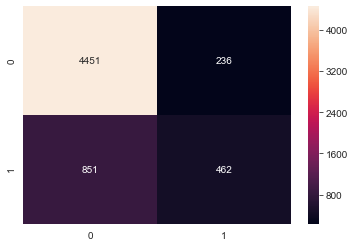

In [73]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='g')